In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import koreanize_matplotlib

## 1. 데이터 로딩 및 탐색 (EDA)
문제 1. `/mnt/data/fintech_customer_value.csv`를 읽어 `df`라는 DataFrame으로 저장하세요.

문제 2. `df.head()`, `df.info()`, `df.describe()`를 출력하여 데이터 구조와 스케일을 파악하세요.
- 어떤 변수가 가장 큰 규모(숫자 범위)인가요? -> annual_fee_revenue 가장 큰 규모입니다.
- 결측치는 있나요? -> 없습니다.

문제 3. `df.corr()`로 상관행렬을 구하고, 어떤 설명변수가 `annual_fee_revenue`와 가장 강하게 상관되어 보이는지 적어보세요.
  (원하면 `sns.heatmap(df.corr(), annot=True)`로 시각화하세요.)

In [3]:
df = pd.read_csv("./data/16_fintech_customer_value.csv")

In [6]:
df.head()

,avg_session_length,time_in_trading_app,time_in_support,member_months,annual_fee_revenue
0,30.205960,11.922653,46.600535,17.898812,174.656875
1,36.094353,7.099605,41.168410,11.816718,194.571116
2,29.672607,17.151397,40.932152,11.039731,214.300409
3,30.056819,9.017350,27.084152,11.039861,148.825997
4,32.971027,11.899779,33.840879,32.529640,243.837602


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   avg_session_length   500 non-null    float64
 1   time_in_trading_app  500 non-null    float64
 2   time_in_support      500 non-null    float64
 3   member_months        500 non-null    float64
 4   annual_fee_revenue   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [8]:
df.describe()

,avg_session_length,time_in_trading_app,time_in_support,member_months,annual_fee_revenue
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.009569,12.024312,37.709936,14.895539,190.834223
std,3.347330,2.483366,5.947631,9.005692,32.509281
min,20.817169,4.821793,17.171421,0.244667,97.846402
25%,30.607236,10.376795,33.656514,8.349711,167.944455
50%,33.070575,12.151295,37.786059,13.139257,191.111933
75%,35.105510,13.766911,41.833011,19.321328,211.552593
max,43.377536,18.827168,54.295679,51.544382,284.522895


In [9]:
df.corr()

,avg_session_length,time_in_trading_app,time_in_support,member_months,annual_fee_revenue
avg_session_length,1.000000,-0.037000,0.014072,-0.030738,0.261994
time_in_trading_app,-0.037000,1.000000,0.005359,-0.001261,0.337332
time_in_support,0.014072,0.005359,1.000000,0.009225,-0.227180
member_months,-0.030738,-0.001261,0.009225,1.000000,0.621089
annual_fee_revenue,0.261994,0.337332,-0.227180,0.621089,1.000000


<Axes: >

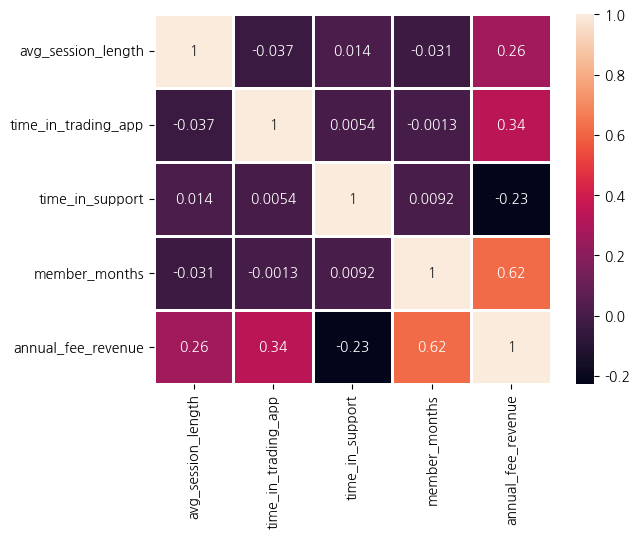

In [11]:
plt.figure()
sns.heatmap(df.corr(),annot=True,linewidths=1)

## 2. 단일 변수 회귀 (Simple Linear Regression)
먼저 하나의 설명변수만으로 `annual_fee_revenue`를 예측해 봅니다. <br>
예를 들어 `member_months`만 사용한다고 가정해보세요.<br>

문제 4. X로 `df[['member_months']]`, y로 `df['annual_fee_revenue']`를 준비하세요.<br>
문제 5. `statsmodels.api`의 `OLS`를 사용해서 단순 선형회귀 모델을 적합하고 `summary()`를 출력하세요.<br>
- 회귀계수, p-value, R-squared를 보고 해석을 메모하세요.<br>

문제 6. 산점도(가로축=member_months, 세로축=annual_fee_revenue) 위에 예측 직선을 겹쳐서 시각화하세요.<br>
  실제값이 직선 근처에 어느 정도 모이나요?


In [19]:
X = df[['annual_fee_revenue']]
y = df['member_months']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train

,annual_fee_revenue
249,225.888418
433,214.666215
19,174.620229
322,190.172899
332,244.155675
...,...
106,177.623534
270,183.555829
348,200.707868
435,148.190281


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()
ss.fit(X_train)
ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)

In [25]:
ss_X_train = pd.DataFrame(ss_X_train,index=X_train.index,columns=X_train.columns)
ss_X_test = pd.DataFrame(ss_X_test,index=X_test.index,columns=X_test.columns)

In [26]:
ss_X_train

,annual_fee_revenue
249,1.106990
433,0.767332
19,-0.444724
322,0.026003
332,1.659878
...,...
106,-0.353824
270,-0.174274
348,0.344860
435,-1.244669


In [27]:
import statsmodels.api as sm

In [28]:
X_train_const = sm.add_constant(ss_X_train)
X_test_const = sm.add_constant(ss_X_test)

In [29]:
X_train_const

,const,annual_fee_revenue
249,1.0,1.106990
433,1.0,0.767332
19,1.0,-0.444724
322,1.0,0.026003
332,1.0,1.659878
...,...,...
106,1.0,-0.353824
270,1.0,-0.174274
348,1.0,0.344860
435,1.0,-1.244669


In [30]:
lr = sm.OLS(y_train,X_train_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:          member_months   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     244.3
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           2.79e-43
Time:                        16:38:19   Log-Likelihood:                -1340.6
No. Observations:                 400   AIC:                             2685.
Df Residuals:                     398   BIC:                             2693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.6241      0

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
# 회귀 분석 모델로 예측하기
pred = lr.predict(X_test_const)
print("mean_squared_error",mean_squared_error(y_test,pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

mean_squared_error 58.11007170498627
mean_squared_error 7.622996241963278


In [33]:
temp1 = pd.DataFrame(y_test)

In [35]:
temp2 = pd.DataFrame(pred)

In [37]:
result = pd.concat([temp1,temp2],axis=1)
result.columns = ['member_months','pred']
result

,member_months,pred
361,6.072371,1.183334
73,20.835884,19.029030
374,37.121085,20.955429
155,17.326856,15.746787
104,12.330876,14.475602
...,...,...
347,20.897094,16.727577
86,3.344006,13.572488
75,4.133652,13.012454
438,7.726137,11.356992


In [38]:
result['편차'] = result['member_months'] - result['pred']
result

,member_months,pred,편차
361,6.072371,1.183334,4.889038
73,20.835884,19.029030,1.806853
374,37.121085,20.955429,16.165656
155,17.326856,15.746787,1.580070
104,12.330876,14.475602,-2.144726
...,...,...,...
347,20.897094,16.727577,4.169516
86,3.344006,13.572488,-10.228483
75,4.133652,13.012454,-8.878802
438,7.726137,11.356992,-3.630855


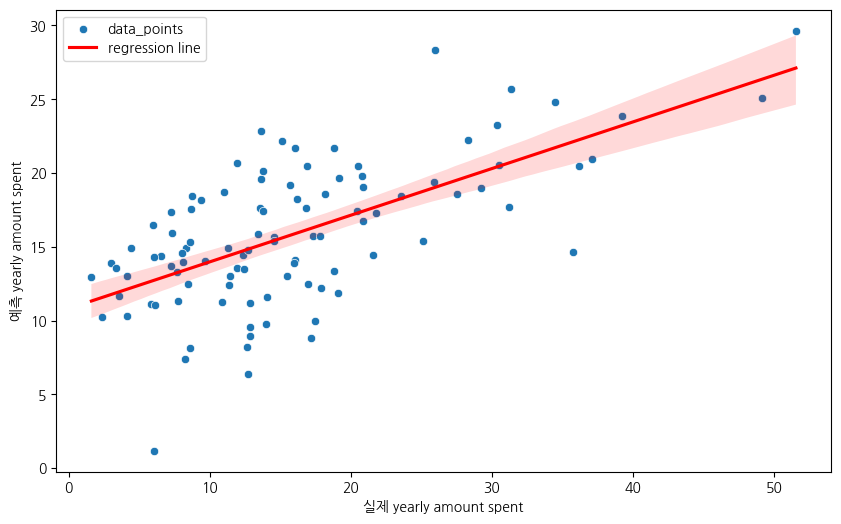

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=pred,label='data_points')
sns.regplot(x=y_test,y=pred,scatter=False,label='regression line',color = 'red')
plt.xlabel("실제 yearly amount spent")
plt.ylabel("예측 yearly amount spent")
plt.legend()
plt.show()

직선 주변에 실제값이 모이긴 하지만 절반은 주변 외에 있는건 알 수 있다.

## 3. 다중 회귀 (Multiple Linear Regression)
이번에는 모든 행동 변수(`avg_session_length`, `time_in_trading_app`, `time_in_support`, `member_months`)를 사용해
`annual_fee_revenue`를 예측해봅니다.

문제 7. X를 위 4개 변수로, y를 `annual_fee_revenue`로 두고
`sm.add_constant(X)` 후 `OLS(y, X_const).fit()`으로 모델을 적합하세요. `summary()`를 보세요.

In [58]:
X = df.drop('annual_fee_revenue',axis=1)
y = df['annual_fee_revenue']

In [59]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [61]:
lr = sm.OLS(y_train,X_train_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     annual_fee_revenue   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     183.3
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           1.28e-88
Time:                        17:15:20   Log-Likelihood:                -1756.8
No. Observations:                 400   AIC:                             3524.
Df Residuals:                     395   BIC:                             3544.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  51.0095    

문제 8. 단일 변수 모델과 비교했을 때,
- R-squared는 얼마나 증가했나요? 0.266증가 했습니다.
- 어떤 변수가 통계적으로 유의(p-value가 낮음)해 보이나요? 
- 반대로 영향이 약해 보이는 변수는 무엇인가요?

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
# 회귀 분석 모델로 예측하기
pred = lr.predict(X_test_const)
print("mean_squared_error",mean_squared_error(y_test,pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

mean_squared_error 354.52686261162927
mean_squared_error 18.828883732490073
